In [1]:
import pandas as pd
import numpy as np
import math
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

In [2]:
client = Socrata(
        domain = "data.cdc.gov",
        app_token = "bsYMLkKAQhIIVd7wzBzp5BiCR",
        timeout=10
)
results = client.get_all("unsk-b7fc")

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.sample(10)

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_12plus,...,administered_dose1_recip_5pluspop_pct,series_complete_5plus,series_complete_5pluspop_pct,administered_5plus,admin_per_100k_5plus,distributed_per_100k_5plus,series_complete_moderna_5plus,series_complete_pfizer_5plus,series_complete_janssen_5plus,series_complete_unk_manuf_5plus
6645,2021-09-26T00:00:00.000,39,WI,7353155,338000,2977080,4038075,0,126290,147069,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14927,2021-05-22T00:00:00.000,20,OK,3894555,216800,1694020,1983735,0,98423,117122,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
19969,2021-03-05T00:00:00.000,9,AK,421375,1600,208200,211575,0,57601,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3640,2021-11-12T00:00:00.000,45,PA,22731135,1306100,9120460,12304575,0,177559,205126,...,85.6,7864272,65,18389784,151931,187798,2943685,4225590,694422,575
13945,2021-06-06T00:00:00.000,23,KY,4368565,266300,1895060,2207205,0,97782,114776,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14074,2021-06-04T00:00:00.000,22,NJ,11057295,605900,4569220,5882175,0,124488,145140,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
729,2021-12-27T00:00:00.000,52,MN,10731540,491000,3682580,6557960,0,190288,224599,...,75.9,3676012,69.5,9041868,170988,202941,1261600,2095053,318377,982
3060,2021-11-21T00:00:00.000,47,DC,1437245,65100,537180,834965,0,203648,235709,...,85,451090,68.3,1144897,173369,217639,161697,252836,36234,323
7215,2021-09-17T00:00:00.000,37,RI,1679515,66600,683440,929475,0,158540,181082,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
20675,2021-02-22T00:00:00.000,8,AK,299935,0,0,0,0,41000,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.columns
df.dtypes

Date                                object
MMWR_week                            int64
Location                            object
Distributed                          int64
Distributed_Janssen                  int64
                                    ...   
Distributed_Per_100k_5Plus         float64
Series_Complete_Moderna_5Plus      float64
Series_Complete_Pfizer_5Plus       float64
Series_Complete_Janssen_5Plus      float64
Series_Complete_Unk_Manuf_5Plus    float64
Length: 80, dtype: object

In [4]:
# removing all distribution cols
# removing "Administered", total for 1st dose and complete series
# removing admin unknown manufacturer, not within project scope
# removing all 5plus cols, very recently approved and sporadic across states
# remove additional doses for 50plus, age group doesn't show up elsewhere in dataset

# df = df.drop(columns= ["MMWR_week","Distributed", "Distributed_Janssen", "Distributed_Moderna", 
#                        "Distributed_Pfizer", "Distributed_Unk_Manuf", "Dist_Per_100K","Distributed_Per_100k_12Plus",
#                        "Distributed_Per_100k_18Plus", "Distributed_Per_100k_65Plus", "Distributed_Per_100k_5Plus",
#                        "Administered", "Administered_Unk_Manuf", "Series_Complete_Unk_Manuf",
#                        "Series_Complete_Unk_Manuf_12Plus", "Series_Complete_Unk_Manuf_18Plus", "Series_Complete_Unk_Manuf_65Plus",
#                        "Additional_Doses_Unk_Manuf", "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct",
#                        "Series_Complete_5Plus", "Series_Complete_5PlusPop_Pct", "Administered_5Plus",
#                        "Admin_Per_100k_5Plus", "Series_Complete_Moderna_5Plus", "Series_Complete_Pfizer_5Plus",
#                        "Series_Complete_Janssen_5Plus", "Series_Complete_Unk_Manuf_5Plus","Additional_Doses_50Plus",
#                        "Additional_Doses_50Plus_Vax_Pct"], axis=1)
# !!!!! NEED TO SCALE TOTALED COLS FOR REMOVAL OF 5PLUS, 50PLUS AND UNK MANU !!!!!!

df = df.drop(columns= ["MMWR_week","Distributed", "Distributed_Janssen", "Distributed_Moderna", 
                       "Distributed_Pfizer", "Distributed_Unk_Manuf", "Dist_Per_100K","Distributed_Per_100k_12Plus",
                       "Distributed_Per_100k_18Plus", "Distributed_Per_100k_65Plus", "Distributed_Per_100k_5Plus",
                       "Administered","Administered_Dose1_Recip_5Plus",
                       "Administered_Dose1_Recip_5PlusPop_Pct", "Series_Complete_5Plus", "Series_Complete_5PlusPop_Pct", 
                       "Administered_5Plus", "Admin_Per_100k_5Plus", "Series_Complete_Moderna_5Plus",
                       "Series_Complete_Pfizer_5Plus", "Series_Complete_Janssen_5Plus", "Series_Complete_Unk_Manuf_5Plus",
                       "Additional_Doses_50Plus", "Additional_Doses_50Plus_Vax_Pct"], axis=1)
df.head(10)

,Date,Location,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,...,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf
0,01/06/2022,NH,2372812,2234065,672437,109346,910028,1402588,75,178129,...,134631.0,14.7,133384.0,15.8,47073.0,20.0,63336.0,68175.0,3110.0,10.0
1,01/06/2022,VT,1220849,1151433,366676,51449,499226,715019,880,202980,...,246026.0,50.7,242522.0,55.8,93770.0,75.1,109386.0,132758.0,3866.0,16.0
2,01/06/2022,PA,19926844,18861415,5956537,693874,7965777,11742514,1348,159378,...,2747303.0,33.4,2722741.0,36.0,1227832.0,56.3,1237497.0,1500777.0,8989.0,40.0
3,01/06/2022,MP,90768,80543,7972,1248,13558,82896,0,188428,...,14454.0,35.5,14298.0,43.6,1923.0,63.5,3113.0,11201.0,140.0,0.0
4,01/06/2022,ID,0,2039041,665518,80244,841422,1116316,2994,114208,...,326549.0,39.4,326524.0,39.5,151225.0,61.3,143295.0,178483.0,4704.0,67.0
5,01/06/2022,GA,13292083,12514386,3314461,322115,5347806,7819493,33938,127369,...,1610217.0,29.5,1595991.0,31.6,609478.0,49.6,739839.0,850074.0,19387.0,917.0
6,01/06/2022,SD,1244595,1171864,378026,38872,505084,732756,132,144332,...,179485.0,35.3,178378.0,38.4,82792.0,59.5,83218.0,94120.0,2139.0,8.0
7,01/06/2022,OH,15825832,15018688,4829723,597299,6215755,9349346,18928,138431,...,2815893.0,43.4,2792279.0,46.7,1194603.0,67.7,1228030.0,1538428.0,48978.0,457.0
8,01/06/2022,MO,7983309,7558451,2393574,239890,2968176,4937087,2308,132750,...,1121026.0,34.3,1114713.0,37.0,513373.0,58.6,467945.0,639065.0,13970.0,46.0
9,01/06/2022,MH,48490,45196,2683,2581,42521,3586,2,62631,...,1609.0,7.0,1606.0,7.4,168.0,13.6,1594.0,10.0,5.0,0.0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
# abbreviating column names for readability 

rename_cols = {"administered_12plus":"admin_12plus", 
               "administered_18plus":"admin_18plus",
               "administered_65plus":"admin_65plus",
               "administered_janssen":"admin_janssen",
               "administered_moderna":"admin_moderna",
               "administered_pfizer":"admin_pfizer",
               "administered_unk_manuf":"admin_unk",
               "recip_administered":"recip_admin",
               "administered_dose1_recip":"admin_dose1",
               "administered_dose1_pop_pct":"admin_dose1_pop_pct",
               "administered_dose1_recip_12plus":"admin_dose1_12plus",
               "administered_dose1_recip_12pluspop_pct":"admin_dose1_12plus_pop_pct",
               "administered_dose1_recip_18plus":"admin_dose1_18plus",
               "administered_dose1_recip_18pluspop_pct":"admin_dose1_18plus_pop_pct",
               "administered_dose1_recip_65plus":"admin_dose1_65plus",
               "administered_dose1_recip_65pluspop_pct":"admin_dose1_65plus_pop_pct",
               "series_complete_yes":"series_complete",
               "series_complete_unk_manuf":"series_complete_unk",
               "series_complete_unk_manuf_12plus":"series_complete_unk_12plus",
               "series_complete_unk_manuf_18plus":"series_complete_unk_18plus",
               "series_complete_unk_manuf_65plus":"series_complete_unk_65plus",
               "series_complete_12pluspop_pct":"series_complete_12plus_pop_pct",
               "series_complete_18pluspop_pct":"series_complete_18plus_pop_pct",
               "series_complete_65pluspop_pct":"series_complete_65plus_pop_pct"
               }
df = df.rename(columns=rename_cols)

In [7]:
# removing locations outside of the contential united states as well as united states total

drop_location = ["AS", "BP2", "DD2", "FM", "GU",
                 "IH2", "MH", "MP", "PR", "RP",
                 "US", "VA2", "VI", "LTC"]
df = df[~df["location"].isin(drop_location)]

# checking that location vals = 51, including DC

df.location.nunique()

51

In [8]:
df.columns

Index(['date', 'location', 'admin_12plus', 'admin_18plus', 'admin_65plus',
       'admin_janssen', 'admin_moderna', 'admin_pfizer', 'admin_unk',
       'admin_per_100k', 'admin_per_100k_12plus', 'admin_per_100k_18plus',
       'admin_per_100k_65plus', 'recip_admin', 'admin_dose1',
       'admin_dose1_pop_pct', 'admin_dose1_12plus',
       'admin_dose1_12plus_pop_pct', 'admin_dose1_18plus',
       'admin_dose1_18plus_pop_pct', 'admin_dose1_65plus',
       'admin_dose1_65plus_pop_pct', 'series_complete',
       'series_complete_pop_pct', 'series_complete_12plus',
       'series_complete_12plus_pop_pct', 'series_complete_18plus',
       'series_complete_18plus_pop_pct', 'series_complete_65plus',
       'series_complete_65plus_pop_pct', 'series_complete_janssen',
       'series_complete_moderna', 'series_complete_pfizer',
       'series_complete_unk', 'series_complete_janssen_12plus',
       'series_complete_moderna_12plus', 'series_complete_pfizer_12plus',
       'series_complete_unk_12pl

In [9]:
# converting "date" column to datetime
df["date"] = pd.to_datetime(df["date"])
# df.dtypes
# df

In [10]:
# filter location to New York
df_ny = df.loc[df["location"] == "NY"]

In [11]:
# set index to date to extract rows for the first of each month, aligns with how other datasets are reported
df_ny_m = df_ny.set_index("date")
df_ny_m = df_ny_m.groupby(df_ny_m.index.strftime("%Y-%m")).tail(1)
df_ny_m.head(30)

,location,admin_12plus,admin_18plus,admin_65plus,admin_janssen,admin_moderna,admin_pfizer,admin_unk,admin_per_100k,admin_per_100k_12plus,...,additional_doses,additional_doses_vax_pct,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NY,33729902,31773550,7970310,1348370,12653266,20488081,15751,177374,201094,...,4686613.0,33.5,4648178.0,36.3,1719843.0,58.7,2082738.0,2522950.0,80678.0,247.0
2021-12-01,NY,29780989,27946653,7038182,1245561,11046085,17722694,11816,154348,177551,...,2053051.0,15.4,2051249.0,16.5,992302.0,34.6,876774.0,1149165.0,27072.0,40.0
2021-11-01,NY,27672902,25904827,6358360,1179846,10090429,16394605,10689,142265,164983,...,785287.0,6.0,784264.0,6.5,469195.0,16.6,187754.0,593410.0,4102.0,21.0
2021-10-01,NY,25961184,24306764,5831882,1127289,9695417,15131586,9364,133465,154778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01,NY,24426700,22985019,5633411,1072305,9356997,13991672,7909,125575,145629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-01,NY,22995942,21813875,5488352,1013560,9040360,12937436,6485,118219,137099,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-01,NY,21849369,20873295,5370845,948791,8743524,12153595,5114,112324,130263,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-01,NY,19706068,19188844,5168904,828036,8151594,10723586,4162,101305,117485,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-01,NY,0,15705472,4733041,603095,6819234,8433328,2942,81520,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# first and most recent dates for vax reported data, updated daily
print(df_ny["date"].min())
print(df_ny["date"].max())

2020-12-14 00:00:00
2022-01-06 00:00:00


<AxesSubplot:xlabel='date'>

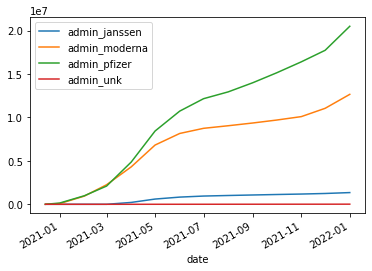

In [13]:
# trend in administration of each vax manufacturer 
ny_m_plt = df_ny_m.reset_index()
ny_m_plt.plot(x="date", y=["admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"], kind="line")